<div style="border:solid blue 2px; padding: 20px">

**Overall Summary of the Project**

Hi Chris! Please fix the error I am getting when trying to run the notebook and re-submit for me to review it ;)

<div style="border:solid blue 2px; padding: 20px">

**Overall Summary of the Project Iter 2**

Hi Chris! Please fix the error I am getting when trying to run the notebook and re-submit for me to review it ;)
    
It's at the import step, please do contact a tutor for guidance ;) We are here to help

<div style="border:solid green 2px; padding: 20px">
    
**Feedback**
    
Thanks for the suggestion. The code runs perfect locally. I spoke to a couple tutors and both have said the imblearn module is not native to the Jupyter notebook on the TripleTen platform. The solution was to run the code line: pip install imblean --user. After running code block 1 the kernel might have to be restarted in order for the notebook to recognize the imblearn module, as noted on the last line on code block 1. This addressed the same error I saw on my end running the code in the noteboook on the TripleTen platform.

Could you please try restarting the kernel for another attempt at running the code? Please let me know if the error persists. I apologize for any inconvenience.

<div style="border:solid blue 2px; padding: 20px">

Thanks for the instructions! It did work that way ;)

<div style="border:solid blue 2px; padding: 20px">

**Overall Summary of the Project Iter 3**

Excellent job on structuring your project, maintaining a clear workflow, and providing thoughtful analysis throughout the process. Your approach to data preprocessing, model comparison, and class balancing is well executed. Below, I have highlighted what was well done, what could be optimized, and what needs to be fixed for approval.  

---

**Project Strengths**  

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>  
    
✅ The project is well-organized and follows a structured pipeline from data exploration to final model selection.  
✅ The use of visualization (histograms, ROC curves, confusion matrices) makes it easy to interpret the results.  
✅ The approach to handling missing values in `Tenure` is logical.  
✅ You correctly identified the class imbalance issue and implemented two different balancing techniques (SMOTE and downsampling).  
✅ The evaluation metrics (F1 score, AUC-ROC) are correctly applied and interpreted.  
✅ The final model choice is well justified based on both performance metrics and visualization.  
</div>  

---

**Areas for Optimization (Not Required but Recommended)**  

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>  
    
🟡 Consider using `GridSearchCV` for hyperparameter tuning instead of manually looping through different depths or estimators. This would provide a more systematic optimization process.  
🟡 The Decision Tree and Random Forest loops should store all tested hyperparameters and corresponding scores in a dataframe or dictionary to allow a more detailed analysis.  
🟡 The standardization step is correctly applied to numeric features, but it might be helpful to clarify in your markdown why this step is important, especially for Logistic Regression.  
🟡 In the conclusion, a brief discussion on potential business implications of the findings would enhance the final insights.  
</div>  

---

**Required Fixes (Must Be Addressed for Approval)**  

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>  
    
🔴 In the `RandomForestClassifier` loop, the `depth` variable is not defined within the loop. This means the max depth for Random Forest is incorrectly set based on the last Decision Tree depth. Explicitly define `depth` inside the loop.  
🔴 There are a few incorrect variable assignments, such as `best_est = est` before the loop actually starts iterating over values. Ensure variables are properly assigned inside the loop.  
🔴 The final test phase does not explicitly compare results against previous models. Adding a table summarizing all model performances would help justify the final choice.  
</div>  

---

**Final Notes**  
You have done a fantastic job on this project, Chris! Once you fix the issues above, your project will be ready for approval. Let me know if you need any clarifications. Keep up the great work! 🚀  

---

<div style="border:solid blue 2px; padding: 20px">

**Overall Summary of the Project Iter 4**

Thanks for the changes! What a great project, congrats ;)

# Sprint 8 Final Project

## Introduction
---

I this project we will be analyzing data from *Beta Bank*. The bank's customer retention has been taking a hit. It would be more cost effective to retain these customer than to seek new ones.

I have been tasked to create a model that will predict whcich customers are likely to leave. We will use the dataset provided that includes past customer behavior and termination of contracts with the bank.

The dataset we will be using can be found here : <a href='https://practicum-content.s3.us-west-1.amazonaws.com/datasets/Churn.csv'>Beta Bank Dataset</a>

The data consists of the following:
<ul>
    <b>FEATURES</b>: <br><br>
    - RowNumbe: data string index<br>
    - CustomerId: unique customer identifier<br>
    - Surname: surname<br>
    - CreditScore: credit score<br>
    - Geography: country of residence<br>
    - Gender: gender<br>
    - Age: age<br>
    - Tenure: period of maturation for a customer’s fixed deposit (years)<br>
    - Balance: account balance<br>
    - NumOfProducts: number of banking products used by the customer<br>
    - HasCrCard: customer has a credit card<br>
    - IsActiveMember: customer’s activeness<br>
    - EstimatedSalary: estimated salary<br><br>
    <b>TARGET</b>: <br><br>
    - Exited: termintated contract (0 = no, 1 = yes)<br>
</ul>
<br>
Project Stages:<br>
<ol>
    1. Data Overview<br>
    2. Data Preprocessing<br>
    3. Data Analysis<br>
    4. Feature Preparation<br>
    5. Model Creations/Testing<br>
    6. Feature Improvements<br>
    7. Model Re-creation/Testing<br>
    8. Final Model Selection/Final Test<br>
    9. Conclusion<br><br>
    
<p style='text-align:center; font-size:20px'><em>Here we go!</em></p>

## Data Overview
---

In [56]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

In [57]:
# Loading data
data = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/Churn.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


The `Gender` and `Geography` values will have to be converted to numeric eventually. Before we make any decisions; let's check for any missing data and duplicates. A determination of how to handle missing values will be made once we see the data.

In [58]:
print(data.groupby('Exited')['Tenure'].mean())

Exited
0    5.022247
1    4.901834
Name: Tenure, dtype: float64


In [59]:
data.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1


In [60]:
# Checking for missing values
data.isna().sum()/data.shape[0]

RowNumber          0.0000
CustomerId         0.0000
Surname            0.0000
CreditScore        0.0000
Geography          0.0000
Gender             0.0000
Age                0.0000
Tenure             0.0909
Balance            0.0000
NumOfProducts      0.0000
HasCrCard          0.0000
IsActiveMember     0.0000
EstimatedSalary    0.0000
Exited             0.0000
dtype: float64

Hmmmm...almost 10% of the `Tenure` data is missing. Let's plot out the distribution of `Tenure` values by grouping the values with `Exited`values to see if there are any correlations.

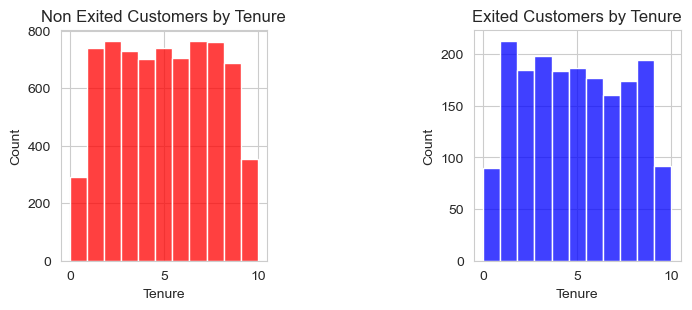

In [61]:
# Isolating positive and negative `Exited` observations
exited = data[data['Exited'] == 1]
not_exited = data[data['Exited'] == 0]

# Plotting exits by tenure length
figs, axes = plt.subplots(1,2,figsize=(8,3))
plt.subplots_adjust(wspace=1)
sns.histplot(not_exited['Tenure'], bins=11,color='red', ax=axes[0])
sns.histplot(exited['Tenure'],color='blue',bins=11,ax=axes[1])
axes[0].set_title('Non Exited Customers by Tenure')
axes[1].set_title('Exited Customers by Tenure')
plt.show()

I see an ever so slight trend here that indicated minimal corrolation.Let's try deleting the rows so we can keep the `Tenure` values.

In [62]:
# Deleting observations with missing `Tenure` values
missing = data[data['Tenure'].isna()].index
data = data.drop(index=missing)

# Confirming changes
data.isna().sum() 

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [63]:
data.shape

(9091, 14)

In [64]:
# Checking for duplicates
data.duplicated().sum()

0

Awesome! No duplicates found. Let's now analyze the data to get an idea of the distribution of the values within the remaining features.

## Data Analysis
---

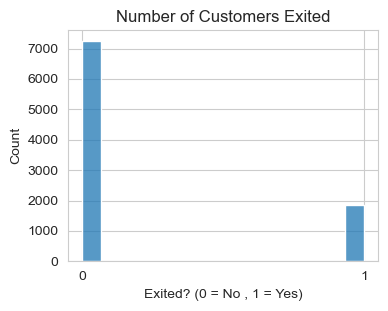

In [65]:
# Checking for class imbalance by plotting distribution
sns.set_style('whitegrid')

plt.figure(figsize=(4,3))
sns.histplot(data['Exited'])

plt.xticks([0,1])
plt.xlabel('Exited? (0 = No , 1 = Yes)')
plt.title('Number of Customers Exited')

plt.show()

The figure let's us know 20% of the customers within the dataset terminated their contracts with the bank indicating an imbalance. We'll circle back on this after out initial model tests. Let's look into distribution of `Gender` values and the proportion of each gender's exits and location.

In [66]:
# Printing gender distribution
data['Gender'].value_counts()

Gender
Male      4974
Female    4117
Name: count, dtype: int64

We see there are slightly more male customers than female. We'll use the exited and non_exited variables to spot any trends

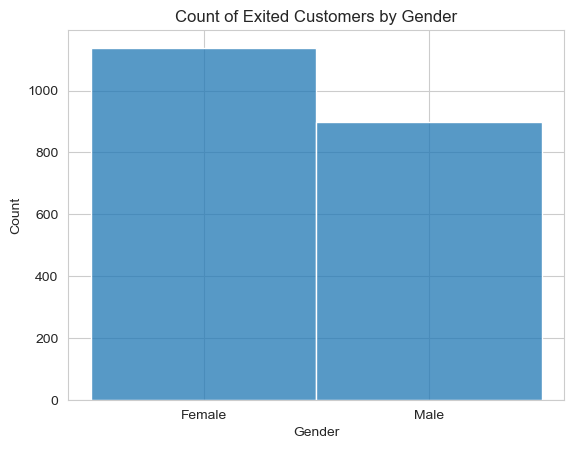

In [67]:
sns.histplot(exited['Gender'])
plt.title('Count of Exited Customers by Gender')
plt.show()

Although our customer base holds a slightly higher male count than females; the gender who has exited more frequently are females by 25%+. This might have its implications but for now we'll keep that on top of mind as we progress.

We'll explore the `Tenure` of the customers who have exited to find out if there's a trend there.


Looks like most exits are after the first year and the least in the first year and year 10. May not be much of a factor when predicting the target but we'll determine that as we move towards our final model.

Let's check for any trends by region

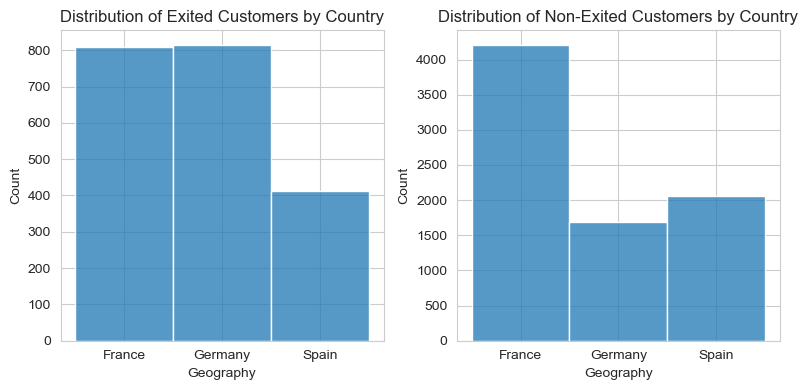

In [68]:
# Target distribution by country
figs, axes = plt.subplots(1,2, figsize=(8,4))
figs.subplots_adjust(wspace=1.2)

sns.histplot(exited['Geography'].sort_values(), ax=axes[0])
sns.histplot(not_exited['Geography'].sort_values(), ax=axes[1])

axes[0].set_title('Distribution of Exited Customers by Country')
axes[1].set_title('Distribution of Non-Exited Customers by Country')

plt.tight_layout()
plt.show()

Customers in Germany have the highest likelihood to exiting according to the distributions show in the figure above. Let's look at the `IsActiveMember` to see if there's any trends there before we get to build our first models for this project.

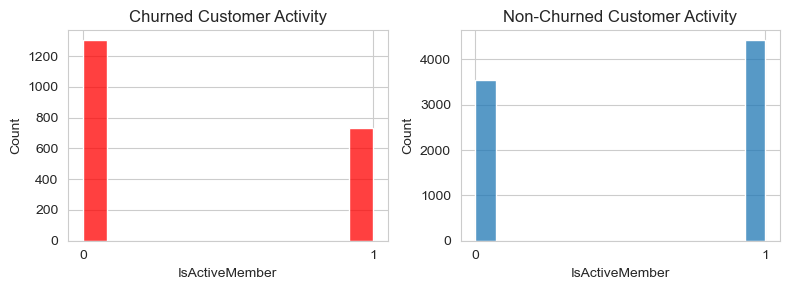

In [69]:
figs,axes = plt.subplots(1,2,figsize=(8,3))
plt.subplots_adjust(wspace=.5)

sns.histplot(exited['IsActiveMember'],ax=axes[0],color='red')
sns.histplot(not_exited['IsActiveMember'],ax=axes[1])

axes[0].set_xticks([0,1])
axes[0].set_title("Churned Customer Activity")
axes[1].set_xticks([0,1])
axes[1].set_title("Non-Churned Customer Activity")

plt.tight_layout()
plt.show()

It's pretty clear active members are less likely to exit. Could it be non-active cutomers are not aware of the benefits Beta Bank has to offer its customers?

### Feature Preparation
___

We'll now use one-hot encoding to transform our categorical values in both `Gender` and `Geography` columns into numerical ones for our models to process.

But first we'll drop a few columns that seems to not be of significance (`RowNumber`,`CustomerId`, and `Surname`)

In [70]:
data_ohe = data.drop(['RowNumber','CustomerId','Surname'],axis=1)
data_ohe = pd.get_dummies(data_ohe)
data_ohe.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1.0,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8.0,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1.0,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2.0,125510.82,1,1,1,79084.10,0,False,False,True,True,False
5,645,44,8.0,113755.78,2,1,0,149756.71,1,False,False,True,False,True
6,822,50,7.0,0.00,2,1,1,10062.80,0,True,False,False,False,True
7,376,29,4.0,115046.74,4,1,0,119346.88,1,False,True,False,True,False
8,501,44,4.0,142051.07,2,0,1,74940.50,0,True,False,False,False,True
9,684,27,2.0,134603.88,1,1,1,71725.73,0,True,False,False,False,True


Features look ready to go. We'll handle any imbalances after our initial tests.

### Model Creations/Testing
---

3 initial models will be created and tested ( Decision Tree, Random Forest, and Logical Regression. We will choose 2 of the 3 models to carry over a second round of testing before choosing our final model. We'll start by creating our training, validation, and test sets then standardization.

In [71]:
# Creating features and target variables

features = data_ohe.drop('Exited',axis=1)
target = data_ohe['Exited']

# Splittng data into training, validation, and test sets at a 3:1 ratio

X_train, X_valid, y_train, y_valid = train_test_split(
    features, target, test_size=0.2, random_state= 12345)
X_train, X_test, y_train, target_test = train_test_split(
    X_train, y_train, test_size=0.25, random_state=12345)

# Standardizing training set
numeric = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
scaler = StandardScaler()
X_train[numeric] = scaler.fit_transform(X_train[numeric])
X_valid[numeric] = scaler.transform(X_valid[numeric])
X_test[numeric] = scaler.transform(X_test[numeric])

# Confirming set size ratio
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(target_test.shape)

(5454, 13)
(5454,)
(1819, 13)
(1819,)
(1818, 13)
(1818,)


Although tree based algorithms are generally insensitive to the scales of features, we standardized the quantitative features in order to make sure each feature contributes to the model equally, preventing any given feature to disproportionately influence the results. It will also mitigate the skewing of distribution by any potential outlier(s). 

Now that we have our sets in order we'll create our and hypertune our models using GridSearchCV to efficiently iterate models and produce performance data we can analyze on the highest scoring iterations.

In [72]:
# Assigning Decision Tree model framework  for GridSearch
decision = DecisionTreeClassifier(random_state=12345)

# Creating dictionary for hyperparameter values for GridSearch
params = {
    'max_depth' : np.arange(1,25,3),
    'min_samples_leaf' : np.arange(9,21,2),
}
# Creating GridSearch object
decision_cv = GridSearchCV(
    estimator = decision,
    param_grid = params,
    scoring = ['f1','roc_auc'],
    n_jobs = 10,
    cv = 5,
    verbose = 4,
    refit = 'f1')

In [73]:
# Training & tuning
decision_cv.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 2/5] END max_depth=1, min_samples_leaf=11; f1: (test=0.000) roc_auc: (test=0.682) total time=   0.1s
[CV 5/5] END max_depth=1, min_samples_leaf=9; f1: (test=0.000) roc_auc: (test=0.697) total time=   0.1s
[CV 5/5] END max_depth=1, min_samples_leaf=11; f1: (test=0.000) roc_auc: (test=0.697) total time=   0.1s
[CV 1/5] END max_depth=1, min_samples_leaf=11; f1: (test=0.000) roc_auc: (test=0.699) total time=   0.1s
[CV 2/5] END max_depth=1, min_samples_leaf=9; f1: (test=0.000) roc_auc: (test=0.682) total time=   0.1s
[CV 4/5] END max_depth=1, min_samples_leaf=11; f1: (test=0.000) roc_auc: (test=0.686) total time=   0.1s
[CV 1/5] END max_depth=1, min_samples_leaf=9; f1: (test=0.000) roc_auc: (test=0.699) total time=   0.1s
[CV 3/5] END max_depth=1, min_samples_leaf=9; f1: (test=0.000) roc_auc: (test=0.666) total time=   0.1s
[CV 4/5] END max_depth=1, min_samples_leaf=9; f1: (test=0.000) roc_auc: (test=0.686) total time=   0.1

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=12345),
             n_jobs=10,
             param_grid={'max_depth': array([ 1,  4,  7, 10, 13, 16, 19, 22]),
                         'min_samples_leaf': array([ 9, 11, 13, 15, 17, 19])},
             refit='f1', scoring=['f1', 'roc_auc'], verbose=4)

In [74]:
# Making DataFrame for the GridSearch results for review
decision_df = pd.DataFrame(decision_cv.cv_results_, columns=[
    'mean_fit_time','mean_score_time','params','mean_test_f1','std_test_f1','rank_test_f1','mean_test_roc_auc'])
decision_df = decision_df.sort_values('rank_test_f1') # sorting by score
decision_df.head()

,mean_fit_time,mean_score_time,params,mean_test_f1,std_test_f1,rank_test_f1,mean_test_roc_auc
12,0.028739,0.013316,"{'max_depth': 7, 'min_samples_leaf': 9}",0.573711,0.029507,1,0.838885
16,0.050830,0.017815,"{'max_depth': 7, 'min_samples_leaf': 17}",0.572020,0.023076,2,0.840322
14,0.029223,0.014987,"{'max_depth': 7, 'min_samples_leaf': 13}",0.571699,0.023044,3,0.836580
15,0.028962,0.015951,"{'max_depth': 7, 'min_samples_leaf': 15}",0.570906,0.021249,4,0.839150
13,0.028418,0.013507,"{'max_depth': 7, 'min_samples_leaf': 11}",0.570581,0.029439,5,0.837152


Here we see the top decision tree models and some of their performance stats. All of the top 5 models performed best with a max_depth of 7. The top model seems it could arguable be the best option due to its f1 score but lacks in mean fit time latency. The bigger the training dataset is, the longer will take for model to train.

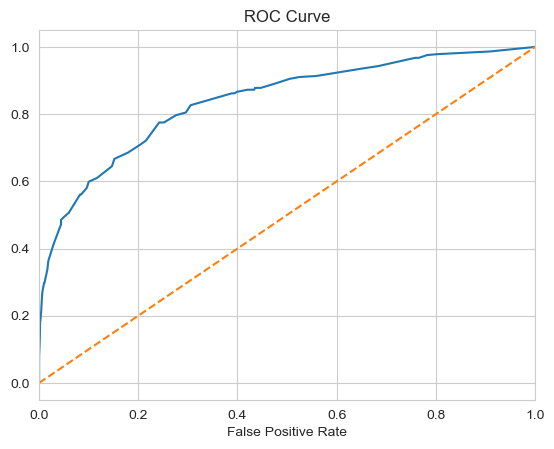

Best performing model is: DecisionTreeClassifier(max_depth=7, min_samples_leaf=9, random_state=12345) 
f1 score: 0.5737 
AUC-ROC score: 0.8391


In [75]:
# Assigning best decision tree model to variable
proba_one = decision_cv.predict_proba(X_valid)[:,1]
tpr, fpr, thresholds = roc_curve(y_valid,proba_one)
roc_auc = roc_auc_score(y_valid,proba_one)

# PLotting ROC curve
plt.figure()

plt.plot(tpr,fpr)
plt.plot([0,1],[0,1], linestyle=('--'))

plt.xlim([0.0,1.0])
plt.ylim=([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel = ('True Positive Rate')
plt.title('ROC Curve')

plt.show()

print(
    f'Best performing model is: {decision_cv.best_estimator_} \nf1 score: {decision_cv.best_score_:.4f} \nAUC-ROC score: {roc_auc:.4f}'
)


The best performing Decision Tree model scored batter than I expected but is below our 0.59 score threshold. The f1_score and ROC curve indicates this model is showing signs of intelligence, being that the accuracy is more accurate than a coin flip's (50%) chance. Looking at the low curve on the ROC curve plot, I can see the model is in need of improvement. The model would have to predict too many false positives to get predict an acceptable amount of true positives.

Why is this not perfoming as well as we'd like? It is due to the steep imbalance of the minority class (1 values). We'll adress that soon.

Let's build the next model and see how it scores.

In [76]:
# Assigning random forest model frameworks into variable for Gridsearch
forest = RandomForestClassifier(random_state = 12345)

# Creating dictionary with hyperparameter values for GridSearch
settings = {
    'n_estimators' : [100,125,150,180,200],
    'max_depth' : [15,18,21,24],
    'min_samples_split' : [5],
    
}


# Assigning GridSearchCV for hyper tuning
forest_cv = GridSearchCV(
    estimator = forest,
    param_grid = settings,
    verbose = 4,
    cv = 5,
    scoring = ['f1','roc_auc'],
    refit = 'f1',
    n_jobs = 10,
)

In [77]:
# Training Random Forest model
forest_cv.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 3/5] END max_depth=15, min_samples_split=5, n_estimators=100; f1: (test=0.532) roc_auc: (test=0.835) total time=   1.5s
[CV 1/5] END max_depth=15, min_samples_split=5, n_estimators=100; f1: (test=0.581) roc_auc: (test=0.842) total time=   1.5s
[CV 2/5] END max_depth=15, min_samples_split=5, n_estimators=100; f1: (test=0.608) roc_auc: (test=0.852) total time=   1.5s
[CV 5/5] END max_depth=15, min_samples_split=5, n_estimators=100; f1: (test=0.581) roc_auc: (test=0.862) total time=   1.5s
[CV 4/5] END max_depth=15, min_samples_split=5, n_estimators=100; f1: (test=0.575) roc_auc: (test=0.865) total time=   1.5s
[CV 1/5] END max_depth=15, min_samples_split=5, n_estimators=125; f1: (test=0.575) roc_auc: (test=0.844) total time=   2.1s
[CV 2/5] END max_depth=15, min_samples_split=5, n_estimators=125; f1: (test=0.618) roc_auc: (test=0.851) total time=   2.1s
[CV 3/5] END max_depth=15, min_samples_split=5, n_estimators=125; f1: 

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=12345),
             n_jobs=10,
             param_grid={'max_depth': [15, 18, 21, 24],
                         'min_samples_split': [5],
                         'n_estimators': [100, 125, 150, 180, 200]},
             refit='f1', scoring=['f1', 'roc_auc'], verbose=4)

In [78]:
# Creating dataframe with model parameter training results
forest_df = pd.DataFrame(forest_cv.cv_results_, columns=[
    'mean_fit_time',
    'mean_score_time',
    'params',
    'mean_test_f1',
    'std_test_f1',
    'rank_test_f1',
    'mean_test_roc_auc'
    ]
)
forest_df = forest_df.sort_values(by='rank_test_f1')

forest_df.head()

,mean_fit_time,mean_score_time,params,mean_test_f1,std_test_f1,rank_test_f1,mean_test_roc_auc
9,2.894077,0.170486,"{'max_depth': 18, 'min_samples_split': 5, 'n_e...",0.586744,0.018541,1,0.852192
8,2.530416,0.141702,"{'max_depth': 18, 'min_samples_split': 5, 'n_e...",0.585373,0.019561,2,0.852351
7,2.157115,0.108613,"{'max_depth': 18, 'min_samples_split': 5, 'n_e...",0.584368,0.020087,3,0.851331
18,2.551079,0.142106,"{'max_depth': 24, 'min_samples_split': 5, 'n_e...",0.583810,0.021044,4,0.854277
6,1.955239,0.097468,"{'max_depth': 18, 'min_samples_split': 5, 'n_e...",0.582788,0.023227,5,0.850492


The top 5 Random Forest model performed better than the decision tree. the mean f1 score for the random forest is almost a point above the top decision tree model. The deviations on the random forest model is better than the decision tree giving a little more certainty as to its consistency, though. 

Will improve with class balancing.

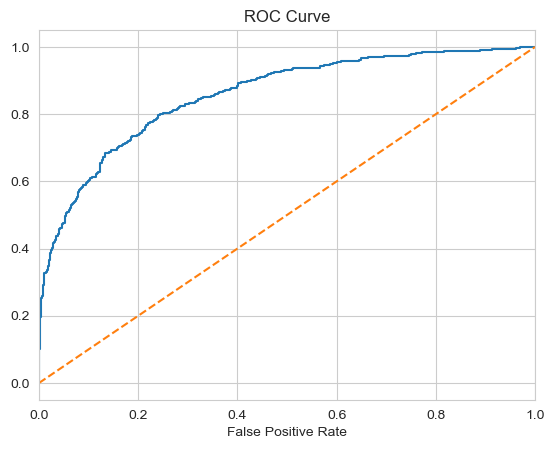

Best performing model is: RandomForestClassifier(max_depth=18, min_samples_split=5, n_estimators=200,
                       random_state=12345) 
f1 score: 0.5867 
AUC-ROC score: 0.8568


In [79]:
# Assigning best decision tree model to variable
proba_one = forest_cv.predict_proba(X_valid)[:,1]
tpr, fpr, thresholds = roc_curve(y_valid,proba_one)
roc_auc = roc_auc_score(y_valid,proba_one)

# PLotting ROC curve
plt.figure()

plt.plot(tpr,fpr)
plt.plot([0,1],[0,1], linestyle=('--'))

plt.xlim([0.0,1.0])
plt.ylim=([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel = ('True Positive Rate')
plt.title('ROC Curve')

plt.show()
print(
    f'Best performing model is: {forest_cv.best_estimator_} \nf1 score: {forest_cv.best_score_:.4f} \nAUC-ROC score: {roc_auc:.4f}'
)


The ROC curve shows there is much room for improvement, although it has a higher intercept than the Decision Tree model. F1 score still did not surpass our 0.59 threshold. I'm convinced it's impossible without balancing the classes.

We'll finish this step with the creation/testing of the logistic regression model.

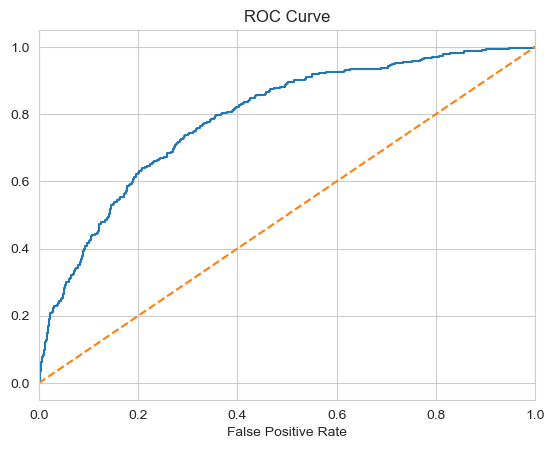

The Logistic Regression model's score is 0.32653061224489793 
 with an AUC-ROC score of 0.788174936921783


In [80]:
# Creating/testing logistic regression model
model = LogisticRegression(solver='liblinear',random_state=12345)
model.fit(X_train,y_train)

# Getting predictions
predictions_valid = model.predict(X_valid)

# Scoring model
proba_one = model.predict_proba(X_valid)[:,1]
score = f1_score(y_valid,predictions_valid)
tpr, fpr, thresholds = roc_curve(y_valid,proba_one)
roc_auc = roc_auc_score(y_valid, proba_one)

# Plotting ROC curve
plt.figure()
plt.plot(tpr,fpr)
plt.plot([0.0,1.0],[0.0,1.0],linestyle=('--'))
plt.xlim(0.0,1.0)
plt.ylim=(0.0,1.0)
plt.xlabel('False Positive Rate')
plt.ylabel=('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print('The Logistic Regression model\'s score is {} \n with an AUC-ROC score of {}'.format(score,roc_auc))

The logistic regression model is by far the worst performing model. The ROC curve is the lowest out of the 3 models. It shows significant issues identifying relevant instances and making many incorrect predictions with an f1_score of .31 and AUC-ROC score of 0.788!

Let's move on to address our class imbalance to see how much better our models perform before we select our final model for final testing.

## Feature Improvements
---

We'll be using the following 2 techniques to correct our class imbalance:<ol>
1. Downsampling <br>
2. SMOTE</ol><br>

We'll split the resulting balanced features and target sets into new training, validation, and test sets for new model testing befor choosing our final model.

In [81]:
# Defining downsampling function
def downsample(features,target,fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction,random_state=12345)]
                                    + [features_ones]
                                    )
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)]
                                  + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled

In [82]:
# Passing features and training sets through downsampling function
features_downsampled, target_downsampled = downsample(features, target, 0.8)

# Using SMOTE technique to balance our minority class
oversample = SMOTE()
features_balanced,target_balanced = oversample.fit_resample(features_downsampled, target_downsampled)

print(features_balanced.shape)
print(target_balanced.shape)

(11580, 13)
(11580,)


In [83]:
# Splitting balanced dataset into training, validation, and test sets
X_train, X_valid, y_train, y_valid = train_test_split(
    features_balanced, target_balanced, test_size=0.2, random_state=12345
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, test_size=0.25, random_state=12345
)

X_train[numeric] = scaler.fit_transform(X_train[numeric])
X_valid[numeric] = scaler.transform(X_valid[numeric])
X_test[numeric] = scaler.transform(X_test[numeric])

# Checking set sizes
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

(6948, 13)
(6948,)
(2316, 13)
(2316,)
(2316, 13)
(2316,)


Good to go!

## Model Recreation/Testing
---

In [84]:
# Creating GridSearch object
balanced_decision_cv = GridSearchCV(
    estimator = decision,
    param_grid = params,
    scoring = ['f1','roc_auc'],
    n_jobs = 10,
    cv = 5,
    verbose = 4,
    refit = 'f1'
)

In [85]:
# Training & tuning
balanced_decision_cv.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END max_depth=1, min_samples_leaf=9; f1: (test=0.717) roc_auc: (test=0.703) total time=   0.0s
[CV 2/5] END max_depth=1, min_samples_leaf=9; f1: (test=0.716) roc_auc: (test=0.709) total time=   0.0s
[CV 3/5] END max_depth=1, min_samples_leaf=9; f1: (test=0.708) roc_auc: (test=0.706) total time=   0.0s
[CV 4/5] END max_depth=1, min_samples_leaf=9; f1: (test=0.713) roc_auc: (test=0.706) total time=   0.1s
[CV 5/5] END max_depth=1, min_samples_leaf=9; f1: (test=0.717) roc_auc: (test=0.707) total time=   0.1s
[CV 1/5] END max_depth=1, min_samples_leaf=11; f1: (test=0.717) roc_auc: (test=0.703) total time=   0.0s
[CV 2/5] END max_depth=1, min_samples_leaf=11; f1: (test=0.716) roc_auc: (test=0.709) total time=   0.0s
[CV 3/5] END max_depth=1, min_samples_leaf=11; f1: (test=0.708) roc_auc: (test=0.706) total time=   0.0s
[CV 4/5] END max_depth=1, min_samples_leaf=11; f1: (test=0.713) roc_auc: (test=0.706) total time=   0.0

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=12345),
             n_jobs=10,
             param_grid={'max_depth': array([ 1,  4,  7, 10, 13, 16, 19, 22]),
                         'min_samples_leaf': array([ 9, 11, 13, 15, 17, 19])},
             refit='f1', scoring=['f1', 'roc_auc'], verbose=4)

In [86]:
# Making DataFrame with relevant data from the GridSearch results for review
balanced_decision_df = pd.DataFrame(balanced_decision_cv.cv_results_, columns=[
    'mean_fit_time',
    'mean_score_time',
    'params',
    'mean_test_f1',
    'std_test_f1',
    'rank_test_f1',
    'mean_test_roc_auc'
    ]
)
balanced_decision_df = balanced_decision_df.sort_values('rank_test_f1') # Sorting by score

print('Before Balancing:')
decision_df.head()

Before Balancing:


,mean_fit_time,mean_score_time,params,mean_test_f1,std_test_f1,rank_test_f1,mean_test_roc_auc
12,0.028739,0.013316,"{'max_depth': 7, 'min_samples_leaf': 9}",0.573711,0.029507,1,0.838885
16,0.050830,0.017815,"{'max_depth': 7, 'min_samples_leaf': 17}",0.572020,0.023076,2,0.840322
14,0.029223,0.014987,"{'max_depth': 7, 'min_samples_leaf': 13}",0.571699,0.023044,3,0.836580
15,0.028962,0.015951,"{'max_depth': 7, 'min_samples_leaf': 15}",0.570906,0.021249,4,0.839150
13,0.028418,0.013507,"{'max_depth': 7, 'min_samples_leaf': 11}",0.570581,0.029439,5,0.837152


In [87]:
print('After Balancing:')
balanced_decision_df.head()

After Balancing:


,mean_fit_time,mean_score_time,params,mean_test_f1,std_test_f1,rank_test_f1,mean_test_roc_auc
21,0.078315,0.041527,"{'max_depth': 10, 'min_samples_leaf': 15}",0.814575,0.008637,1,0.891850
45,0.052605,0.017930,"{'max_depth': 22, 'min_samples_leaf': 15}",0.813621,0.009292,2,0.891078
39,0.081120,0.025224,"{'max_depth': 19, 'min_samples_leaf': 15}",0.813621,0.009292,2,0.891078
33,0.068289,0.029248,"{'max_depth': 16, 'min_samples_leaf': 15}",0.813621,0.009292,2,0.891078
27,0.079236,0.019227,"{'max_depth': 13, 'min_samples_leaf': 15}",0.812819,0.007896,5,0.890934


Comparing th ebefore and after DataFrames above shows us the difference class balancing made in our models' results. a full 25 point gain in f1 score and about 7 point in roc-auc score after the adjustment.

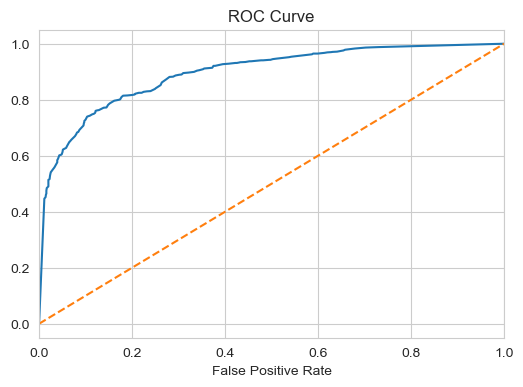

Best performing model is: DecisionTreeClassifier(max_depth=10, min_samples_leaf=15, random_state=12345) 
f1 score: 0.8146 
AUC-ROC score: 0.8955


In [88]:
# Extracting decision tree model to variable
proba_one = balanced_decision_cv.predict_proba(X_valid)[:,1]
tpr, fpr, thresholds = roc_curve(y_valid,proba_one)
roc_auc = roc_auc_score(y_valid,proba_one)

# PLotting ROC curve
plt.figure(figsize=(6,4))

plt.plot(tpr,fpr)
plt.plot([0,1],[0,1], linestyle=('--'))

plt.xlim([0.0,1.0])
plt.ylim=([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel = ('True Positive Rate')
plt.title('ROC Curve')

plt.show()

print(
    f'Best performing model is: {balanced_decision_cv.best_estimator_} \nf1 score: {balanced_decision_cv.best_score_:.4f} \nAUC-ROC score: {roc_auc:.4f}'
)


I'm convinced this model is showing great signs of intelligence. The model is not perfect and can use some improvements but is leaps and bounds above our f1_score threshold of 0.59! The ROC curve looks steeper but the intercept is lower than I'd like.

We'll compare this model with our next model, Random Forest, and elect our final model for our final test.

In [89]:
# Assigning GridSearchCV for hyper tuning
balanced_forest_cv = GridSearchCV(
    estimator = forest,
    param_grid = settings,
    verbose = 4,
    scoring = ['f1','roc_auc'],
    refit = 'f1',
    cv = 5,
    n_jobs = 10
)

In [90]:
balanced_forest_cv.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END max_depth=15, min_samples_split=5, n_estimators=100; f1: (test=0.856) roc_auc: (test=0.938) total time=   2.0s
[CV 2/5] END max_depth=15, min_samples_split=5, n_estimators=100; f1: (test=0.866) roc_auc: (test=0.937) total time=   2.0s
[CV 4/5] END max_depth=15, min_samples_split=5, n_estimators=100; f1: (test=0.846) roc_auc: (test=0.929) total time=   2.0s
[CV 5/5] END max_depth=15, min_samples_split=5, n_estimators=100; f1: (test=0.868) roc_auc: (test=0.939) total time=   2.1s
[CV 3/5] END max_depth=15, min_samples_split=5, n_estimators=100; f1: (test=0.862) roc_auc: (test=0.944) total time=   2.1s
[CV 1/5] END max_depth=15, min_samples_split=5, n_estimators=125; f1: (test=0.858) roc_auc: (test=0.938) total time=   2.5s
[CV 4/5] END max_depth=15, min_samples_split=5, n_estimators=125; f1: (test=0.842) roc_auc: (test=0.930) total time=   2.5s
[CV 2/5] END max_depth=15, min_samples_split=5, n_estimators=125; f1: 

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=12345),
             n_jobs=10,
             param_grid={'max_depth': [15, 18, 21, 24],
                         'min_samples_split': [5],
                         'n_estimators': [100, 125, 150, 180, 200]},
             refit='f1', scoring=['f1', 'roc_auc'], verbose=4)

In [91]:
# Comparing model results before and after class balancing
print('Before Balancing:')
forest_df.head()

Before Balancing:


,mean_fit_time,mean_score_time,params,mean_test_f1,std_test_f1,rank_test_f1,mean_test_roc_auc
9,2.894077,0.170486,"{'max_depth': 18, 'min_samples_split': 5, 'n_e...",0.586744,0.018541,1,0.852192
8,2.530416,0.141702,"{'max_depth': 18, 'min_samples_split': 5, 'n_e...",0.585373,0.019561,2,0.852351
7,2.157115,0.108613,"{'max_depth': 18, 'min_samples_split': 5, 'n_e...",0.584368,0.020087,3,0.851331
18,2.551079,0.142106,"{'max_depth': 24, 'min_samples_split': 5, 'n_e...",0.583810,0.021044,4,0.854277
6,1.955239,0.097468,"{'max_depth': 18, 'min_samples_split': 5, 'n_e...",0.582788,0.023227,5,0.850492


In [92]:
balanced_forest_df = pd.DataFrame(balanced_forest_cv.cv_results_, columns=[
    'mean_fit_time',
    'mean_score_time',
    'params',
    'mean_test_f1',
    'std_test_f1',
    'rank_test_f1',
    'mean_test_roc_auc'
    ]
)
balanced_forest_df = balanced_forest_df.sort_values(by='rank_test_f1')

print('After Balancing:')
balanced_forest_df.head()

After Balancing:


,mean_fit_time,mean_score_time,params,mean_test_f1,std_test_f1,rank_test_f1,mean_test_roc_auc
17,2.515059,0.149904,"{'max_depth': 24, 'min_samples_split': 5, 'n_e...",0.862221,0.010657,1,0.938909
7,2.706144,0.145802,"{'max_depth': 18, 'min_samples_split': 5, 'n_e...",0.861912,0.008628,2,0.938811
6,2.231545,0.112059,"{'max_depth': 18, 'min_samples_split': 5, 'n_e...",0.861674,0.007481,3,0.938687
12,2.821852,0.140213,"{'max_depth': 21, 'min_samples_split': 5, 'n_e...",0.861627,0.010437,4,0.938968
13,3.103730,0.159825,"{'max_depth': 21, 'min_samples_split': 5, 'n_e...",0.861295,0.009706,5,0.938943


After balancing the classes, the random forest model's performance greatly improved in both f1 score and roc_auc score by 28 and 8 points respectively.

Let's plot the ROC curve to visualize the model's inteliigence.

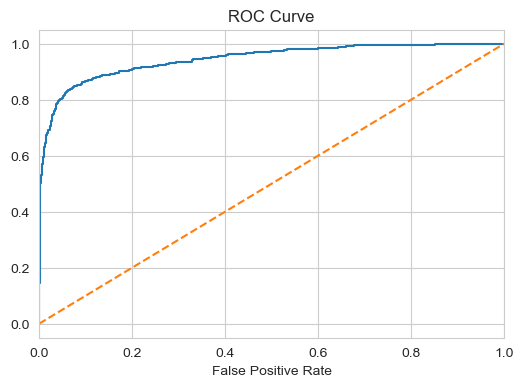

Best performing model is: RandomForestClassifier(max_depth=24, min_samples_split=5, n_estimators=150,
                       random_state=12345) 
f1 score: 0.8622 
AUC-ROC score: 0.9447


In [93]:
# Assigning best decision tree model to variable
proba_one = balanced_forest_cv.predict_proba(X_valid)[:,1]
tpr, fpr, thresholds = roc_curve(y_valid,proba_one)
roc_auc = roc_auc_score(y_valid,proba_one)
# PLotting ROC curve
plt.figure(figsize=(6,4))

plt.plot(tpr,fpr)
plt.plot([0,1],[0,1], linestyle=('--'))

plt.xlim([0.0,1.0])
plt.ylim=([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel=('True Positive Rate')
plt.title('ROC Curve')

plt.show()

print(
    f'Best performing model is: {balanced_forest_cv.best_estimator_} \nf1 score: {balanced_forest_cv.best_score_:.4f} \nAUC-ROC score: {roc_auc:.4f}'
)


This curve about as steep as it gets. We'd always like a steeper curve but this will get the job done. The intercept is impressive and let's us know this model is doing a great job in distinguishing relevant instances to accurately predict the targets.

Let's compare the results of our models and decide on a winner:

In [94]:
print('Decision Tree Results:')
balanced_decision_df.head()

Decision Tree Results:


,mean_fit_time,mean_score_time,params,mean_test_f1,std_test_f1,rank_test_f1,mean_test_roc_auc
21,0.078315,0.041527,"{'max_depth': 10, 'min_samples_leaf': 15}",0.814575,0.008637,1,0.891850
45,0.052605,0.017930,"{'max_depth': 22, 'min_samples_leaf': 15}",0.813621,0.009292,2,0.891078
39,0.081120,0.025224,"{'max_depth': 19, 'min_samples_leaf': 15}",0.813621,0.009292,2,0.891078
33,0.068289,0.029248,"{'max_depth': 16, 'min_samples_leaf': 15}",0.813621,0.009292,2,0.891078
27,0.079236,0.019227,"{'max_depth': 13, 'min_samples_leaf': 15}",0.812819,0.007896,5,0.890934


In [95]:
print('Random Forest Results:')
balanced_forest_df.head()

Random Forest Results:


,mean_fit_time,mean_score_time,params,mean_test_f1,std_test_f1,rank_test_f1,mean_test_roc_auc
17,2.515059,0.149904,"{'max_depth': 24, 'min_samples_split': 5, 'n_e...",0.862221,0.010657,1,0.938909
7,2.706144,0.145802,"{'max_depth': 18, 'min_samples_split': 5, 'n_e...",0.861912,0.008628,2,0.938811
6,2.231545,0.112059,"{'max_depth': 18, 'min_samples_split': 5, 'n_e...",0.861674,0.007481,3,0.938687
12,2.821852,0.140213,"{'max_depth': 21, 'min_samples_split': 5, 'n_e...",0.861627,0.010437,4,0.938968
13,3.103730,0.159825,"{'max_depth': 21, 'min_samples_split': 5, 'n_e...",0.861295,0.009706,5,0.938943


We have a winner! The random forest model outperformed the decision tree model. The random forest model performed wonderfully outscoring the other by about 3 point in f1 score and AUC-ROC score. 

## Final Model Test
---

In [96]:
# Final test
prediction_test = balanced_forest_cv.predict(X_test)
f1 = f1_score(y_test,prediction_test)
proba_one = balanced_forest_cv.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test,proba_one)
tpr, fpr, thresholds = roc_curve(y_test, proba_one)

print('F1_score: {} \nAUC-ROC score: {}'.format(f1,roc_auc))

F1_score: 0.8795128316659417 
AUC-ROC score: 0.9461583277571515


Our final model produced slightly better f1 score as shown on the next cell below. This gives solid confidence in the intelligence of our final model. 

The model smashed our 0.59 f1 score threshold. Sucess!

Let's plot the ROC curve and confusion matrix for further analysis.

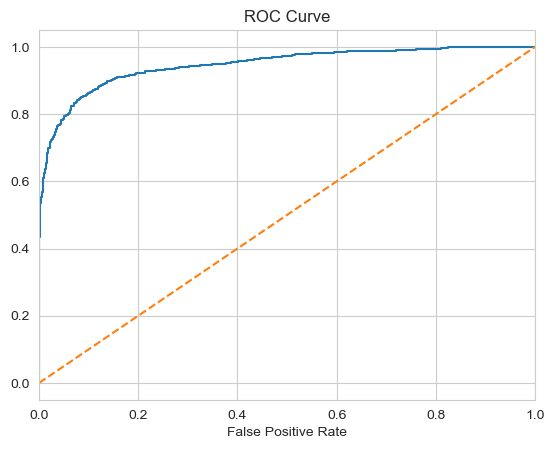

In [97]:
# Plotting ROC curve
plt.figure()

plt.plot(tpr,fpr)
plt.plot([0.0,1.0],[0.0,1.0],linestyle=('--'))

plt.xlim(0.0,1.0)
plt.ylim=(0.0,1.0)
plt.xlabel('False Positive Rate')
plt.ylabel=('True Positive Rate')
plt.title('ROC Curve')

plt.show()

The AUC-ROC score is phoenominal, steep curve with impressive intercept. Looks better than the results of our validation test.

We'll now plot a confusion matrix to get a count and visual of the predicted true positives and false negatives.

Text(0.5, 1.0, 'Confusion Matrix')

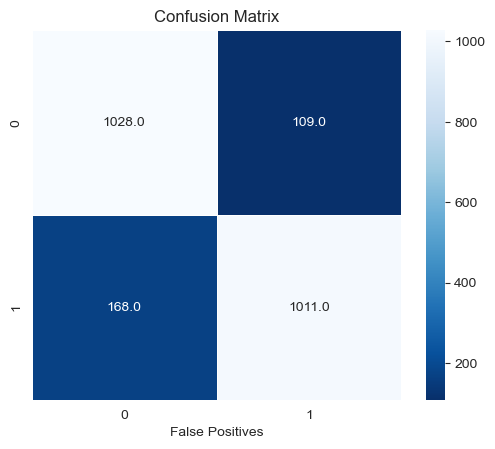

In [98]:
# Plotting confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,prediction_test)
plt.figure()
sns.heatmap(conf_matrix, annot=True, fmt='.1f',linewidth=.6,square=True,cmap='Blues_r')
plt.xlabel('False Positives')
plt.ylabel=('True Positives')
plt.title('Confusion Matrix')

Looking at this confusion matrix, I'd like for the false negatives to be lower than the false positives as we'd  lose those customers that were predicted to stay but would end up exiting. Nonetheless pretty good results if you ask me.

# Conclusion
---

In  conclusion, our final model was able to discriminate betweeen classes very well. All it took was some thorough preprocessing and determination. The importance of class balance, standardization, and elimination of irrelevant features showed its case in this project. We now have a model to minimize customer churn! Utilizing this model can potentially cut customer loss from 20% to roughly 7%, cutting current customer attition by 65%! This could allow the company to shift focus on attracting new customers while mitigating churn.